<a href="https://colab.research.google.com/github/ashwinigit123/DataMining/blob/main/BookRecommendation_itembased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
ratings=pd.read_csv('/content/ratings.csv')
print(ratings.shape)
ratings.head()

(981756, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [136]:
books = pd.read_csv('/content/books.csv')
books.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9780439023480.000,Suzanne Collins,2008.000,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.340,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9780439554930.000,"J.K. Rowling, Mary GrandPré",1997.000,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.440,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9780316015840.000,Stephenie Meyer,2005.000,Twilight,"Twilight (Twilight, #1)",en-US,3.570,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9780061120080.000,Harper Lee,1960.000,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.250,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9780743273560.000,F. Scott Fitzgerald,1925.000,The Great Gatsby,The Great Gatsby,eng,3.890,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [137]:
ratings = ratings.sort_values("user_id")
ratings.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
ratings.head()

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5


In [138]:
books= books.drop(columns=['best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [139]:
books = books.dropna()
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
books.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,1,2767052,272,Suzanne Collins,2008.000,The Hunger Games,eng,4.340,4780653
1,2,3,491,"J.K. Rowling, Mary GrandPré",1997.000,Harry Potter and the Philosopher's Stone,eng,4.440,4602479
3,4,2657,487,Harper Lee,1960.000,To Kill a Mockingbird,eng,4.250,3198671
4,5,4671,1356,F. Scott Fitzgerald,1925.000,The Great Gatsby,eng,3.890,2683664
5,6,11870085,226,John Green,2012.000,The Fault in Our Stars,eng,4.260,2346404


In [140]:
pip install plotly_express==0.4.0

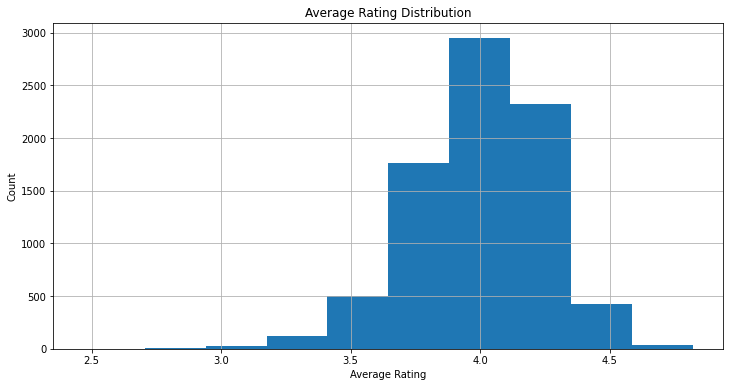

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Average Rating Distribution")
books["average_rating"].hist()
plt.xlabel("Average Rating")
plt.ylabel("Count")
display()

In [142]:
import plotly_express as px
popularAuthors = books['authors'].value_counts().reset_index()
popularAuthors.columns = ['value', 'count']
popularAuthors['value'] = popularAuthors['value']
popularAuthors = popularAuthors.sort_values('count')
fig = px.bar(popularAuthors.tail(10), x="count", y="value", title='Top Authors', orientation='h', color='count',
             width=1000, height=700)
fig.show()

In [143]:
mostPopularBook = books.sort_values('ratings_count', ascending=False)
topfifty = mostPopularBook[:50]
fig = px.bar(topfifty, x="ratings_count", y="original_title", title='Top Popular Books', orientation='h', color='original_title',
             width=1500, height=700)
fig.show()

In [144]:
train=pd.merge(books,ratings)
train =  train.sort_values('book_id', ascending=True)
train.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating
1399,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,439,3
1426,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16377,4
1427,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16913,5
1428,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17434,5
1429,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17663,5


In [145]:
userRatings = train.pivot_table(index=['user_id'],columns=['original_title'],values='rating')
userRatings.head()

original_title,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Room with a View,A Separate Peace,A Short History of Nearly Everything,A Spot of Bother,A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments,A Tale of Two Cities,...,What to Expect the First Year,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,5.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5.000,nan,nan,nan,nan,nan,nan
10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [146]:
userRatings=userRatings.dropna(thresh=10,axis=1).fillna(0)
userRatings.head()

original_title,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Room with a View,A Separate Peace,A Short History of Nearly Everything,A Spot of Bother,A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments,A Tale of Two Cities,...,What to Expect the First Year,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000
10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [147]:
bookRatings = train.dropna(axis = 0, subset = ['original_title'])
BookratingCount = (bookRatings.groupby(by = ['original_title'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['original_title', 'totalRatingCount']])
BookratingCount.head()

,original_title,totalRatingCount
0,Animal Farm & 1984,99
1,Carter Beats the Devil,100
2,The Fellowship of the Ring,98
3,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",95
4,'Salem's Lot The Illustrated Edition,74


In [148]:
rating_with_totalRatingCount = bookRatings.merge(BookratingCount, left_on = 'original_title', right_on = 'original_title', how = 'left')
rating_with_totalRatingCount.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating,totalRatingCount
0,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,439,3,100
1,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16377,4,100
2,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16913,5,100
3,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17434,5,100
4,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17663,5,100


In [149]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(BookratingCount['totalRatingCount'].describe())

count   670.000
mean     97.703
std       5.604
min      57.000
25%      98.000
50%     100.000
75%     100.000
max     100.000
Name: totalRatingCount, dtype: float64


In [150]:
minPopularitythreshold = 50
popularBooks= rating_with_totalRatingCount.query('totalRatingCount >= @minPopularitythreshold')
popularBooks.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating,totalRatingCount
0,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,439,3,100
1,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16377,4,100
2,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16913,5,100
3,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17434,5,100
4,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17663,5,100


In [151]:
popularBooks.shape

(65461, 12)

In [152]:
userBookRating=popularBooks.pivot_table(index='original_title',columns='user_id',values='rating').fillna(0)
userBookRating.head()

user_id,3,4,7,10,11,14,20,22,23,24,27,31,35,40,41,46,47,49,51,52,55,57,60,61,69,75,82,83,87,89,93,95,96,101,104,105,107,109,111,113,...,53333,53334,53336,53337,53339,53341,53342,53345,53348,53349,53350,53352,53354,53356,53364,53366,53371,53372,53373,53374,53377,53378,53381,53382,53388,53389,53391,53393,53398,53400,53403,53404,53406,53408,53409,53416,53419,53420,53422,53423
original_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Farm & 1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Carter Beats the Devil,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
The Fellowship of the Ring,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot The Illustrated Edition,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [153]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

userBookRatingMatrix = csr_matrix(userBookRating.values)
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(userBookRatingMatrix)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [154]:
userBookRating.shape

(670, 25942)

In [155]:
pd.set_option('display.max_rows', userBookRating.shape[0]+1)
print(userBookRating)

user_id                                             3      4      ...  53422  53423
original_title                                                    ...              
 Animal Farm & 1984                                 0.000  0.000  ...  0.000  0.000
 Carter Beats the Devil                             0.000  0.000  ...  0.000  0.000
 The Fellowship of the Ring                         0.000  0.000  ...  0.000  0.000
 めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]         0.000  0.000  ...  0.000  0.000
'Salem's Lot The Illustrated Edition                0.000  0.000  ...  0.000  0.000
'Tis: A Memoir                                      0.000  0.000  ...  0.000  0.000
1421: The Year China Discovered America             0.000  0.000  ...  0.000  0.000
1776                                                0.000  0.000  ...  0.000  0.000
31 Songs                                            0.000  0.000  ...  0.000  0.000
A Bend in the River                                 0.000  0.000  ...  0.000

In [156]:
import numpy as np

def recommnedBook(title):
    query_index = userBookRating.index.get_loc(title)
    distances, indices = model.kneighbors(userBookRating.iloc[query_index,:].values.reshape(1, -1), n_neighbors= 8)
    
    recommended_books = []
    res_dct = dict()
    for x in range(1,6):
        bookrecommended = [userBookRating.index[indices.flatten()[x]], distances.flatten()[x]]
        res_dct = {bookrecommended[i]: bookrecommended[i + 1] for i in range(0, len(bookrecommended), 2)}
        recommended_books.append(res_dct)
    # recommended_books = [recommended_books]
    return recommended_books

In [157]:
 recommnedBook("To Kill a Mockingbird")


[{'The Body Farm': 0.6444824894634775},
 {'The Poetry of Pablo Neruda': 0.6597548721269045},
 {'The BFG': 0.7420647515189125},
 {'The Shipping News': 0.819604287531007},
 {'The Prophet': 0.8449678486055552}]

In [158]:
X = train[['user_id','book_id']]
Y = train['rating']

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
x_train

,user_id,book_id
35598,36564,5357
64735,28189,3446
11552,13636,6327
1626,15102,890
35802,29566,7668
...,...,...
24992,20024,9557
1288,51065,6
56618,381,4955
63119,2485,7252


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

rootmeansqerr_test = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",rootmeansqerr_test)

RMSE 0.9752862279078024


In [161]:
from sklearn.preprocessing import PolynomialFeatures
polyf= PolynomialFeatures(degree=3)
x_poly_train = polyf.fit_transform(x_train)
x_poly_test = polyf.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_poly_pred = model.predict(x_poly_test)
rootmeansqerr = np.sqrt(mean_squared_error(y_test,y_poly_pred))
print("RMSE with polynomial Regression",rootmeansqerr)

RMSE with polynomial Regression 0.9745502653633155


In [162]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(n_estimators=100)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
rootmeansqerr = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE with Random Forest Regressor",rootmeansqerr)

RMSE with Random Forest Regressor 1.008612003992176
